In [61]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [62]:
%run 'cross_validation/functions.ipynb'

In [63]:
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)

In [64]:
hyperparameters = {'n_estimators': 100, 'max_depth': 12, 'max_features': 'sqrt'}

In [65]:
predict_cruise(hyperparameters, 'syn')

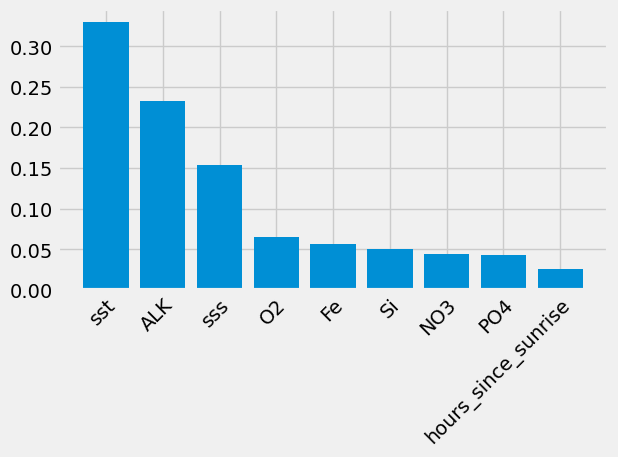

In [66]:
feature_importance('syn',feature_list_syn)

In [67]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [68]:
drop = True
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, ['NO3', 'Fe', 'Si', 'PO4', 'hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)
predict_cruise(hyperparameters, 'syn')

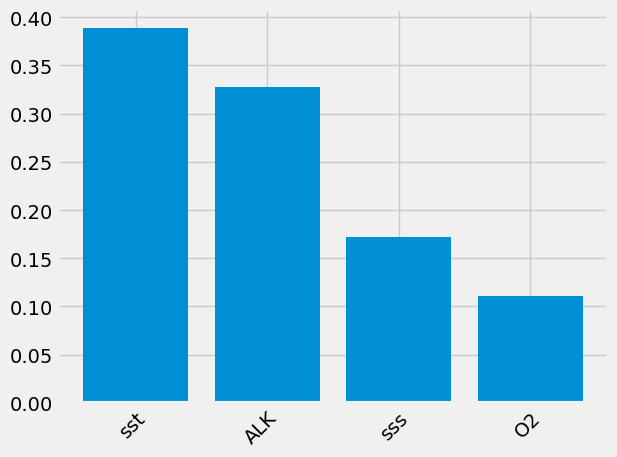

In [69]:
feature_importance('syn',feature_list_syn)

In [70]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [71]:
list_of_rmse = {'original': old_rmse}
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'original': 1.1898856233558202, 'max': 1.2074918656724483}
the percent improvement is: -1.4796583781702843 %


In [72]:
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, ['hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_syn, labels_syn, 8)
predict_cruise(hyperparameters, 'syn')

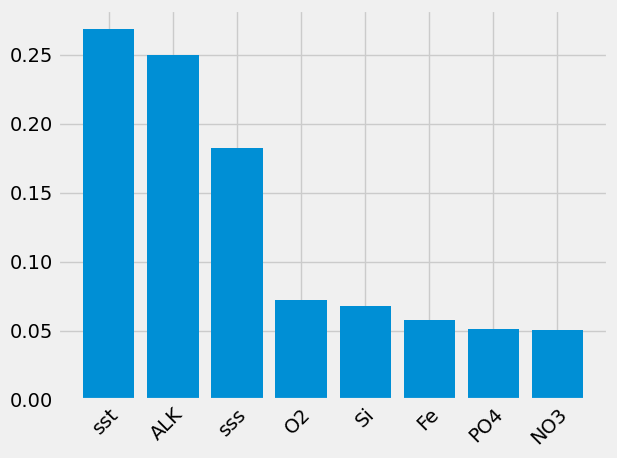

In [73]:
feature_importance('syn',feature_list_syn)

In [74]:
predictions, maes, rmses, sunrise_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'syn')

In [75]:
list_of_rmse['sunrise'] = sunrise_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['sunrise'])/sorted_rmse['original'] * 100, '%' )

{'sunrise': 1.1599416303237366, 'original': 1.1898856233558202, 'max': 1.2074918656724483}
the percent improvement is: 2.5165438126424977 %


In [76]:
hyperparameters={'n_estimators': 200, 'max_depth': 12, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [77]:
hyperparameters={'n_estimators': 40, 'max_depth': 4, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [78]:
hyperparameters={'n_estimators': 40, 'max_depth': 40, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [79]:
hyperparameters={'n_estimators': 120, 'max_depth': 30, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'syn')

In [80]:
drop = False
syn_df, labels_syn, features_syn, feature_list_syn = preprocess_single_population(covari_syn, drop, None)
param_grid = {
        'n_estimators': [60, 80, 120, 180],
        'max_depth': [6, 8, 12, 18],
        'max_features': ['sqrt']
    }

metrics = ['neg_root_mean_squared_error', 'r2', 'explained_variance']
# neg root mean squared error is the same as root mean squared error, but since the function chooses the best score we need to use the negative 

grid_search_hyperparams(param_grid, metrics, features_syn, labels_syn)

Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  neg_root_mean_squared_error are: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}
Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  r2 are: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}
Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  explained_variance are: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}
